<a href="https://colab.research.google.com/github/rindanh/Latihan-NDSC/blob/main/hotel-booking/Hotel-Bookings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**1. Analisis data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/rindanh/Latihan-NDSC/main/hotel-booking/'
df = pd.read_csv(url + "hotel_bookings.csv")

####**1.1 Liat satu-satu datanya**

**Tips:** Liatnya pake transpose `(.T)` biar kolomnya pindah ke baris jadi keliatan langsung semua kolomnya.

In [3]:
df.head().T

0  ...             4
hotel                           Resort Hotel  ...  Resort Hotel
is_canceled                                0  ...             0
lead_time                                342  ...            14
arrival_date_year                       2015  ...          2015
arrival_date_month                      July  ...          July
arrival_date_week_number                  27  ...            27
arrival_date_day_of_month                  1  ...             1
stays_in_weekend_nights                    0  ...             0
stays_in_week_nights                       0  ...             2
adults                                     2  ...             2
children                                   0  ...             0
babies                                     0  ...             0
meal                                      BB  ...            BB
country                                  PRT  ...           GBR
market_segment                        Direct  ...     Online TA
distribution_channel                  Direct  ...         TA/TO
is_repeated_guest                          0  ...             0
previous_cancellations                     0  ...             0
previous_bookings_not_canceled             0  ...             0
reserved_room_type                         C  ...             A
assigned_room_type                         C  ...             A
booking_changes                            3  ...             0
deposit_type                      No Deposit  ...    No Deposit
agent                                    NaN  ...           240
company                                  NaN  ...           NaN
days_in_waiting_list                       0  ...             0
customer_type                      Transient  ...     Transient
adr                                        0  ...            98
required_car_parking_spaces                0  ...             0
total_of_special_requests                  0  ...             1
reservation_status                 Check-Out  ...     Check-Out
reservation_status_date           2015-07-01  ...    2015-07-03

[32 rows x 5 columns]

####**1.2 Bikin summary**

In [4]:
def dataset_summary(df) :

    # Buat summary dataframe
    summary_df = pd.DataFrame()

    # Isi summary
    summary_df['Var'] = df.columns
    summary_df['Dtypes'] = df.dtypes.values
    summary_df['Total Missing'] = df.isnull().sum().values
    summary_df['Missing%'] = summary_df['Total Missing'] / len(df) * 100
    summary_df['Total Unique'] = df.nunique().values
    summary_df['Unique%'] = summary_df['Total Unique'] / len(df) * 100

    # Ukuran dataset
    print('Dataset dimension :',df.shape)

    return summary_df

In [5]:
dataset_summary(df)

Dataset dimension : (119390, 32)


Var   Dtypes  ...  Total Unique   Unique%
0                            hotel   object  ...             2  0.001675
1                      is_canceled    int64  ...             2  0.001675
2                        lead_time    int64  ...           479  0.401206
3                arrival_date_year    int64  ...             3  0.002513
4               arrival_date_month   object  ...            12  0.010051
5         arrival_date_week_number    int64  ...            53  0.044392
6        arrival_date_day_of_month    int64  ...            31  0.025965
7          stays_in_weekend_nights    int64  ...            17  0.014239
8             stays_in_week_nights    int64  ...            35  0.029316
9                           adults    int64  ...            14  0.011726
10                        children  float64  ...             5  0.004188
11                          babies    int64  ...             5  0.004188
12                            meal   object  ...             5  0.004188
13                         country   object  ...           177  0.148254
14                  market_segment   object  ...             8  0.006701
15            distribution_channel   object  ...             5  0.004188
16               is_repeated_guest    int64  ...             2  0.001675
17          previous_cancellations    int64  ...            15  0.012564
18  previous_bookings_not_canceled    int64  ...            73  0.061144
19              reserved_room_type   object  ...            10  0.008376
20              assigned_room_type   object  ...            12  0.010051
21                 booking_changes    int64  ...            21  0.017589
22                    deposit_type   object  ...             3  0.002513
23                           agent  float64  ...           333  0.278918
24                         company  float64  ...           352  0.294832
25            days_in_waiting_list    int64  ...           128  0.107212
26                   customer_type   object  ...             4  0.003350
27                             adr  float64  ...          8879  7.436971
28     required_car_parking_spaces    int64  ...             5  0.004188
29       total_of_special_requests    int64  ...             6  0.005026
30              reservation_status   object  ...             3  0.002513
31         reservation_status_date   object  ...           926  0.775609

[32 rows x 6 columns]

In [6]:
df.describe().T

count         mean  ...     75%     max
is_canceled                     119390.0     0.370416  ...     1.0     1.0
lead_time                       119390.0   104.011416  ...   160.0   737.0
arrival_date_year               119390.0  2016.156554  ...  2017.0  2017.0
arrival_date_week_number        119390.0    27.165173  ...    38.0    53.0
arrival_date_day_of_month       119390.0    15.798241  ...    23.0    31.0
stays_in_weekend_nights         119390.0     0.927599  ...     2.0    19.0
stays_in_week_nights            119390.0     2.500302  ...     3.0    50.0
adults                          119390.0     1.856403  ...     2.0    55.0
children                        119386.0     0.103890  ...     0.0    10.0
babies                          119390.0     0.007949  ...     0.0    10.0
is_repeated_guest               119390.0     0.031912  ...     0.0     1.0
previous_cancellations          119390.0     0.087118  ...     0.0    26.0
previous_bookings_not_canceled  119390.0     0.137097  ...     0.0    72.0
booking_changes                 119390.0     0.221124  ...     0.0    21.0
agent                           103050.0    86.693382  ...   229.0   535.0
company                           6797.0   189.266735  ...   270.0   543.0
days_in_waiting_list            119390.0     2.321149  ...     0.0   391.0
adr                             119390.0   101.831122  ...   126.0  5400.0
required_car_parking_spaces     119390.0     0.062518  ...     0.0     8.0
total_of_special_requests       119390.0     0.571363  ...     1.0     5.0

[20 rows x 8 columns]

#### **1.3 Bedah per column**

##### 1.3.1 Hotel
2 kategori, no null

In [10]:
df.hotel.value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

##### 1.3.1 Lead time

In [13]:
df.lead_time.value_counts()

0      6345
1      3460
2      2069
3      1816
4      1715
       ... 
458       1
371       1
737       1
435       1
387       1
Name: lead_time, Length: 479, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


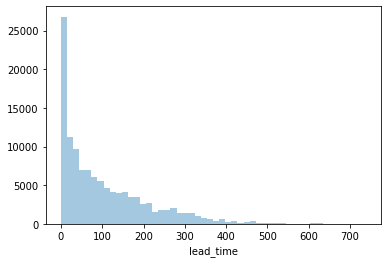

In [14]:
sns.distplot(a=df['lead_time'], kde=False)

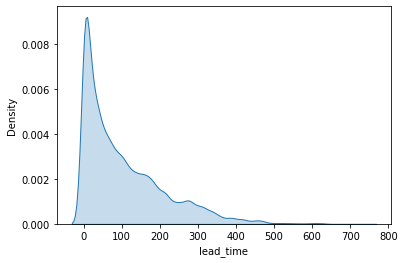

In [15]:
sns.kdeplot(data=df['lead_time'], shade=True)

##### 1.3.1 Arrival date year

In [16]:
df.arrival_date_year.value_counts()

2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

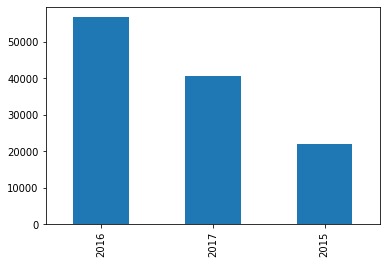

In [18]:
df.arrival_date_year.value_counts().plot(kind="bar")

##### 1.3.1 Arrival date month

In [19]:
df.arrival_date_month.value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

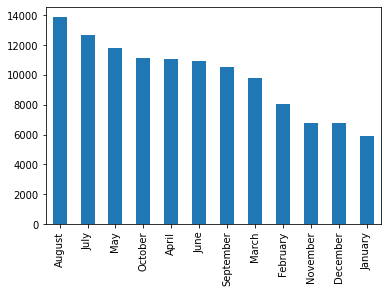

In [20]:
df.arrival_date_month.value_counts().plot(kind="bar")

##### 1.3.1 Arrival date week number

In [21]:
df.arrival_date_week_number.value_counts()

33    3580
30    3087
32    3045
34    3040
18    2926
21    2854
28    2853
17    2805
20    2785
29    2763
42    2756
31    2741
41    2699
15    2689
27    2664
25    2663
38    2661
23    2621
35    2593
39    2581
22    2546
24    2498
13    2416
16    2405
19    2402
40    2397
26    2391
43    2352
44    2272
14    2264
37    2229
8     2216
36    2167
10    2149
9     2117
7     2109
12    2083
11    2070
45    1941
53    1816
49    1782
47    1685
46    1574
6     1508
50    1505
48    1504
4     1487
5     1387
3     1319
2     1218
52    1195
1     1047
51     933
Name: arrival_date_week_number, dtype: int64

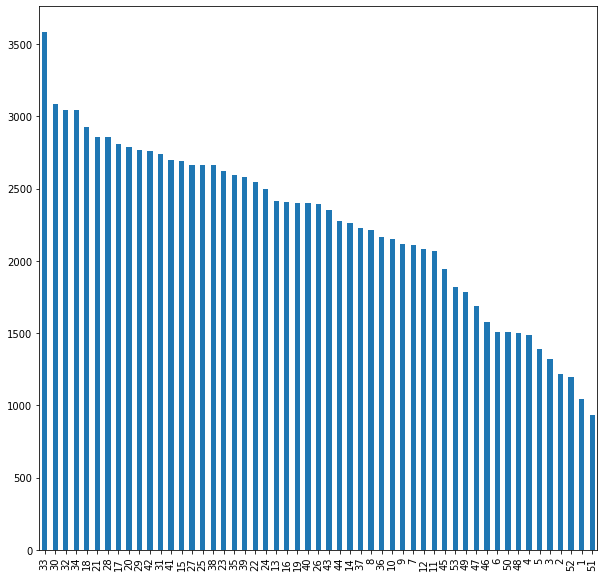

In [24]:
plt.figure(figsize=(10, 10))
df.arrival_date_week_number.value_counts().plot(kind="bar")

##### 1.3.1 stays_in_weekend_nights

In [25]:
df.stays_in_weekend_nights.value_counts()

0     51998
2     33308
1     30626
4      1855
3      1259
6       153
5        79
8        60
7        19
9        11
10        7
12        5
13        3
16        3
14        2
18        1
19        1
Name: stays_in_weekend_nights, dtype: int64

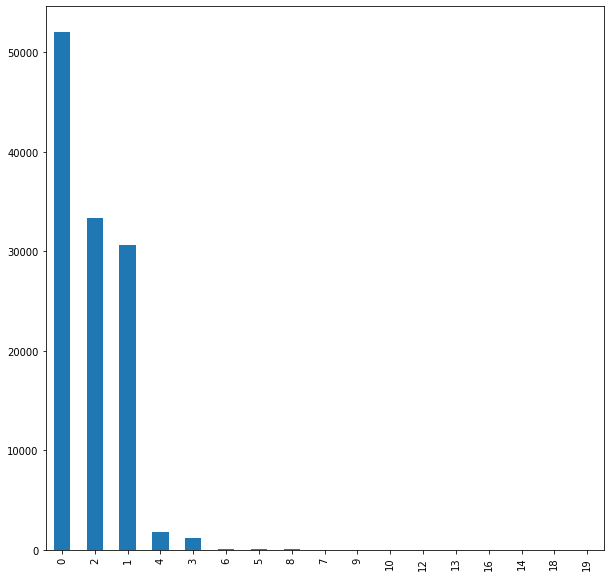

In [27]:
plt.figure(figsize=(10, 10))
df.stays_in_weekend_nights.value_counts().plot(kind='bar')

##### 1.3.1 stays_in_week_nights

In [28]:
df.stays_in_week_nights.value_counts()

2     33684
1     30310
3     22258
5     11077
4      9563
0      7645
6      1499
10     1036
7      1029
8       656
9       231
15       85
11       56
19       44
12       42
20       41
14       35
13       27
16       16
21       15
22        7
18        6
25        6
30        5
17        4
24        3
40        2
42        1
26        1
32        1
33        1
34        1
35        1
41        1
50        1
Name: stays_in_week_nights, dtype: int64

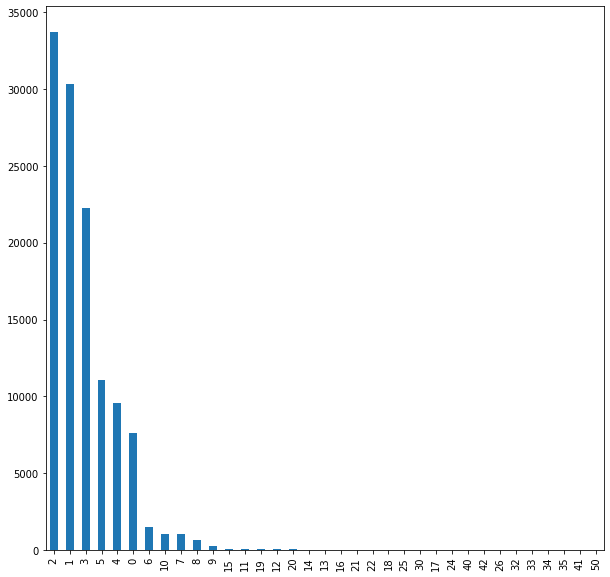

In [29]:
plt.figure(figsize=(10, 10))
df.stays_in_week_nights.value_counts().plot(kind='bar')

##### 1.3.1 adults

In [30]:
df.adults.value_counts()

2     89680
1     23027
3      6202
0       403
4        62
26        5
27        2
20        2
5         2
55        1
50        1
40        1
10        1
6         1
Name: adults, dtype: int64

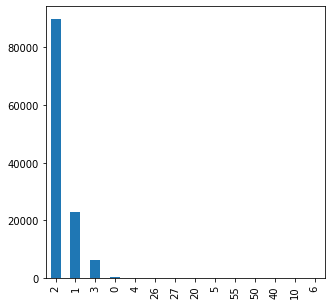

In [32]:
plt.figure(figsize=(5, 5))
df.adults.value_counts().plot(kind='bar')

##### 1.3.1 children

In [33]:
df.children.value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

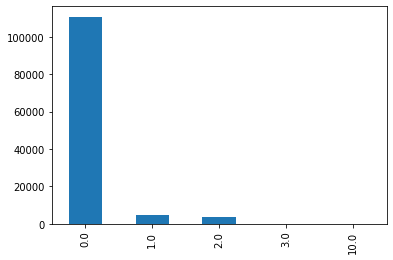

In [34]:
# plt.figure(figsize=(5, 5))
df.children.value_counts().plot(kind='bar')

##### 1.3.1 babies

In [35]:
df.babies.value_counts()

0     118473
1        900
2         15
10         1
9          1
Name: babies, dtype: int64

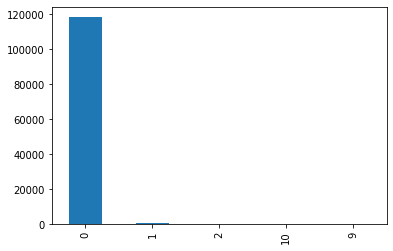

In [36]:
# plt.figure(figsize=(5, 5))
df.babies.value_counts().plot(kind='bar')

##### 1.3.1 is_repeated_guest

In [37]:
df.is_repeated_guest.value_counts()

0    115580
1      3810
Name: is_repeated_guest, dtype: int64

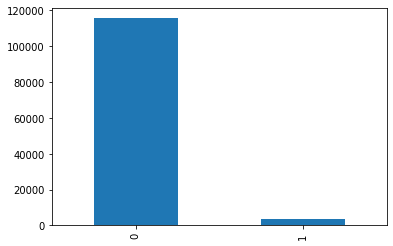

In [38]:
# plt.figure(figsize=(5, 5))
df.is_repeated_guest.value_counts().plot(kind='bar')

####**1.4 Rapihin data biar siap diotak-atik**

####**1.5 Cek masing-masing hasil insight dari summary**

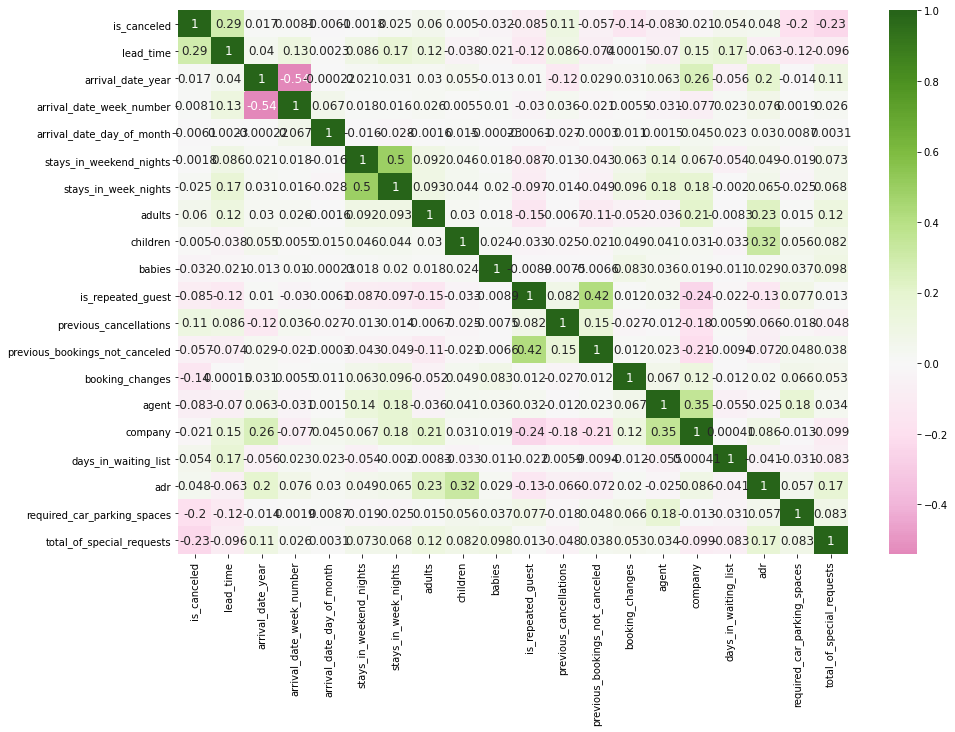

In [7]:
# train_ready_corr = train.corr()

fig, ax = plt.subplots(figsize=(15, 10))

ax = sns.heatmap(df.corr(), cmap='PiYG', annot=True, annot_kws={"size":12}, center=0)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


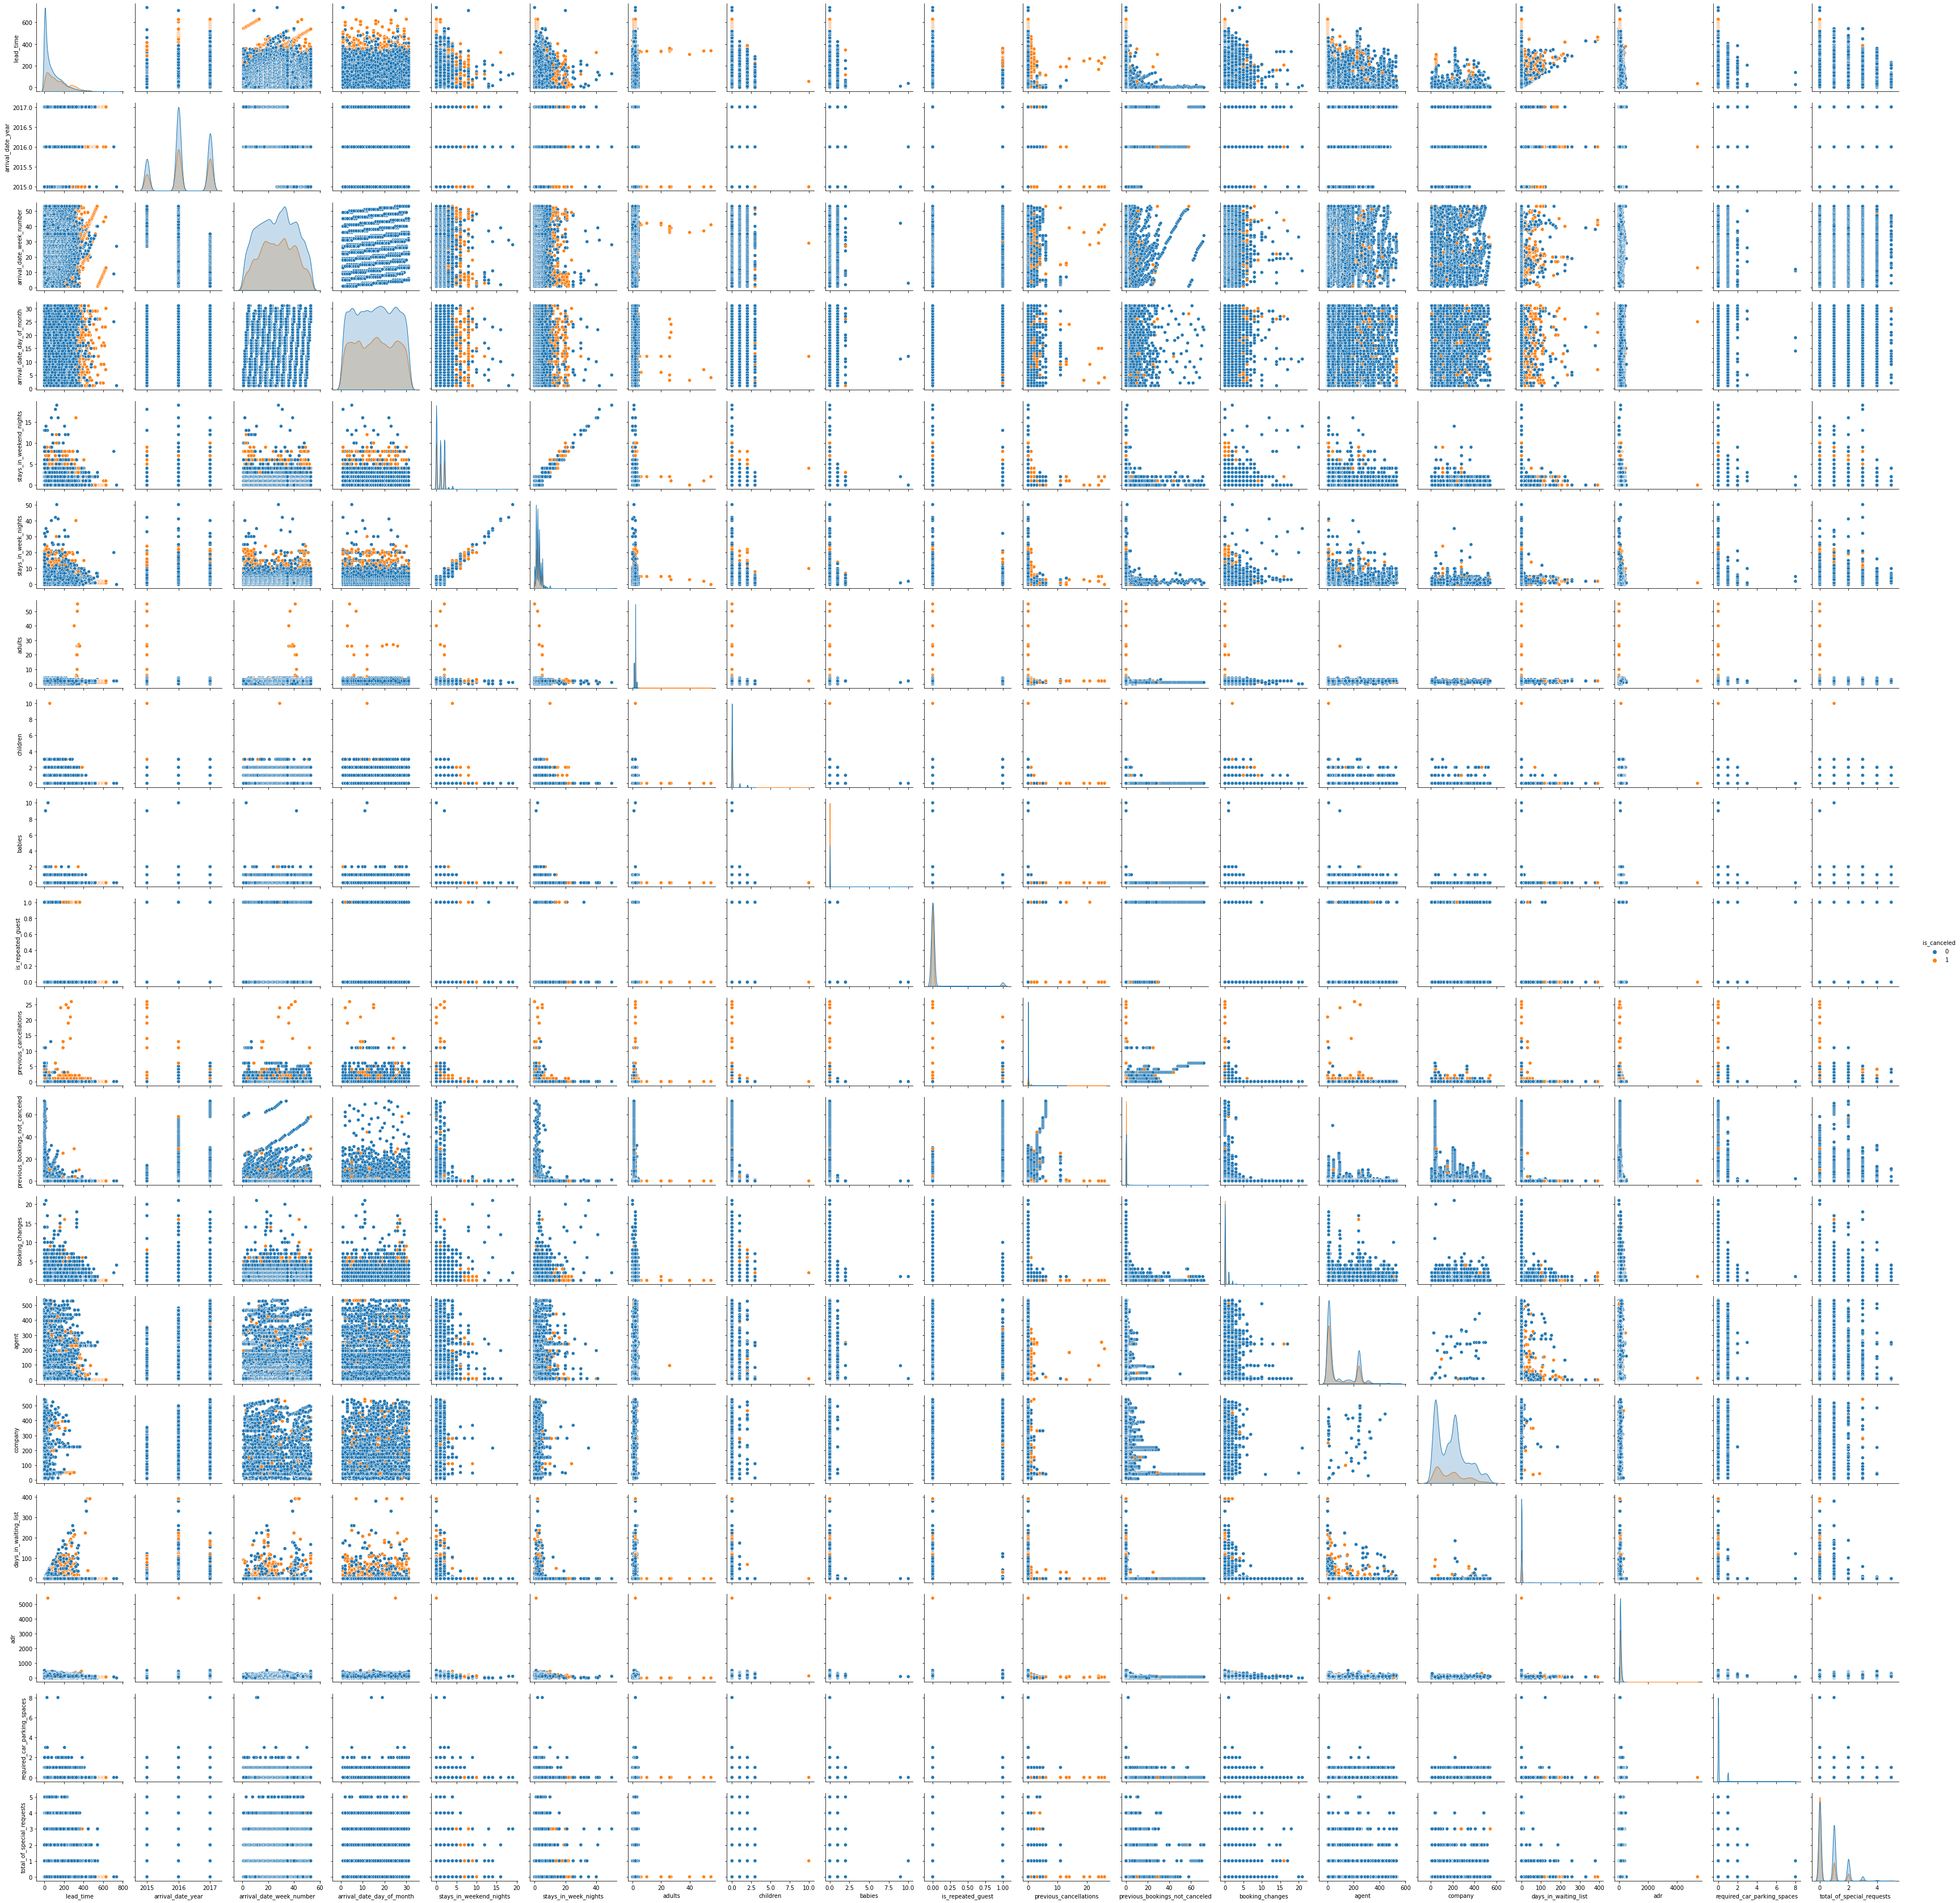

In [9]:
sns.pairplot(df, hue="is_canceled")

###**2. Modelling**